In [1]:
!pip install requests


In [2]:
import requests
import json


In [4]:
# Define your client credentials
CLIENT_ID = '9e02e19e9ac5480a84bf7769e3d997fa'
CLIENT_SECRET = 'ad8921a92ba04cbf88a0a95dd53ed1ea'
AUTH_URL = 'https://accounts.spotify.com/api/token'

# Request access token
auth_response = requests.post(AUTH_URL, {
    'grant_type': 'client_credentials',
    'client_id': CLIENT_ID,
    'client_secret': CLIENT_SECRET,
})

# Convert response to JSON
auth_response_data = auth_response.json()
access_token = auth_response_data['access_token']

print(f"Access Token: {access_token}")


Access Token: BQC-rtd7imA3NLqT20r1Zmt98nAPSwTDGtR5u4BzgzcXqMbtich0kU-gnawyvF9uj9u0I8rT2SEuEOomgEN6r-KZfowNerT5w7i_18ARqxk-Vlv0JdE


In [5]:
# Use the access token to access Spotify API
headers = {
    'Authorization': f'Bearer {access_token}',
}

# Example playlist ID (you can replace it with any playlist ID)
playlist_id = '37i9dQZF1DXcBWIGoYBM5M'

# Fetch playlist tracks
response = requests.get(f'https://api.spotify.com/v1/playlists/{playlist_id}/tracks', headers=headers)
data = response.json()

# Display track details
for item in data['items']:
    track = item['track']
    print(f"Track: {track['name']}, Artist: {track['artists'][0]['name']}, Added At: {item['added_at']}")


Track: Good Luck, Babe!, Artist: Chappell Roan, Added At: 2024-04-19T04:01:02Z
Track: Please Please Please, Artist: Sabrina Carpenter, Added At: 2024-06-07T04:00:19Z
Track: BIRDS OF A FEATHER, Artist: Billie Eilish, Added At: 2024-05-31T04:00:00Z
Track: Too Sweet, Artist: Hozier, Added At: 2024-03-25T12:43:44Z
Track: I Had Some Help (Feat. Morgan Wallen), Artist: Post Malone, Added At: 2024-05-10T04:00:00Z
Track: A Bar Song (Tipsy), Artist: Shaboozey, Added At: 2024-04-26T04:00:00Z
Track: MILLION DOLLAR BABY, Artist: Tommy Richman, Added At: 2024-05-03T04:00:00Z
Track: Espresso, Artist: Sabrina Carpenter, Added At: 2024-04-12T04:00:00Z
Track: Beautiful Things, Artist: Benson Boone, Added At: 2024-01-26T05:00:00Z
Track: we can't be friends (wait for your love), Artist: Ariana Grande, Added At: 2024-03-08T05:00:00Z
Track: LUNCH, Artist: Billie Eilish, Added At: 2024-05-17T04:00:00Z
Track: End of Beginning, Artist: Djo, Added At: 2024-03-01T05:00:00Z
Track: Not Like Us, Artist: Kendrick L

In [6]:
import csv

# Define CSV file
csv_file = 'spotify_playlist_tracks.csv'

# Write data to CSV
with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Track Name', 'Artist Name', 'Added At'])

    for item in data['items']:
        track = item['track']
        writer.writerow([track['name'], track['artists'][0]['name'], item['added_at']])

print(f"Data has been written to {csv_file}")


Data has been written to spotify_playlist_tracks.csv


In [7]:
import pandas as pd

# Load data into a DataFrame
df = pd.read_csv('spotify_playlist_tracks.csv')

# Display the first few rows of the DataFrame
print(df.head())

# Display basic information about the DataFrame
print(df.info())


                              Track Name        Artist Name  \
0                       Good Luck, Babe!      Chappell Roan   
1                   Please Please Please  Sabrina Carpenter   
2                     BIRDS OF A FEATHER      Billie Eilish   
3                              Too Sweet             Hozier   
4  I Had Some Help (Feat. Morgan Wallen)        Post Malone   

               Added At  
0  2024-04-19T04:01:02Z  
1  2024-06-07T04:00:19Z  
2  2024-05-31T04:00:00Z  
3  2024-03-25T12:43:44Z  
4  2024-05-10T04:00:00Z  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Track Name   50 non-null     object
 1   Artist Name  50 non-null     object
 2   Added At     50 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB
None


In [8]:
# Convert 'Added At' to datetime
df['Added At'] = pd.to_datetime(df['Added At'])

# Display the updated DataFrame
print(df.head())


                              Track Name        Artist Name  \
0                       Good Luck, Babe!      Chappell Roan   
1                   Please Please Please  Sabrina Carpenter   
2                     BIRDS OF A FEATHER      Billie Eilish   
3                              Too Sweet             Hozier   
4  I Had Some Help (Feat. Morgan Wallen)        Post Malone   

                   Added At  
0 2024-04-19 04:01:02+00:00  
1 2024-06-07 04:00:19+00:00  
2 2024-05-31 04:00:00+00:00  
3 2024-03-25 12:43:44+00:00  
4 2024-05-10 04:00:00+00:00  


In [9]:
# Extract month and day of the week
df['Month'] = df['Added At'].dt.month
df['Day of Week'] = df['Added At'].dt.day_name()

# Display the updated DataFrame
print(df.head())


                              Track Name        Artist Name  \
0                       Good Luck, Babe!      Chappell Roan   
1                   Please Please Please  Sabrina Carpenter   
2                     BIRDS OF A FEATHER      Billie Eilish   
3                              Too Sweet             Hozier   
4  I Had Some Help (Feat. Morgan Wallen)        Post Malone   

                   Added At  Month Day of Week  
0 2024-04-19 04:01:02+00:00      4      Friday  
1 2024-06-07 04:00:19+00:00      6      Friday  
2 2024-05-31 04:00:00+00:00      5      Friday  
3 2024-03-25 12:43:44+00:00      3      Monday  
4 2024-05-10 04:00:00+00:00      5      Friday  


In [10]:
# Count the number of tracks added each month
monthly_trends = df['Month'].value_counts().sort_index()

print("Monthly Trends:")
print(monthly_trends)


Monthly Trends:
1      2
2      3
3      6
4     14
5      9
6      9
11     6
12     1
Name: Month, dtype: int64


In [11]:
# Count the number of tracks added on each day of the week
weekly_trends = df['Day of Week'].value_counts().sort_index()

print("Weekly Trends:")
print(weekly_trends)


Weekly Trends:
Friday     46
Monday      3
Tuesday     1
Name: Day of Week, dtype: int64


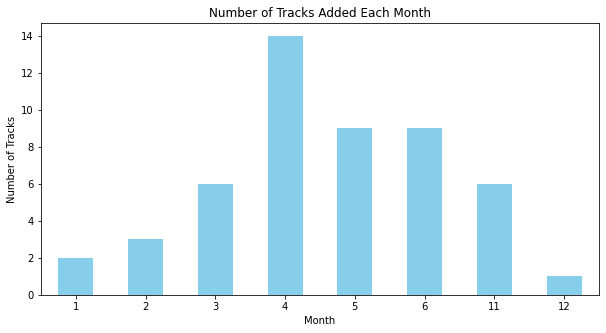

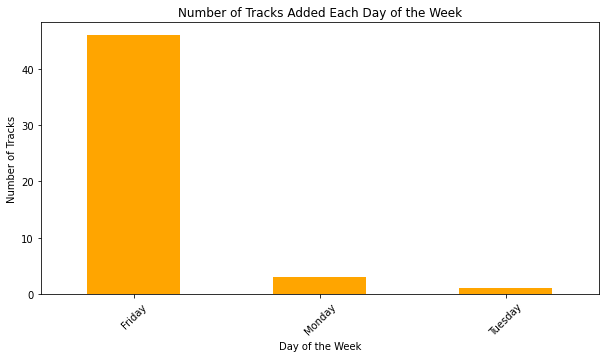

In [12]:
import matplotlib.pyplot as plt

# Plot monthly trends
plt.figure(figsize=(10, 5))
monthly_trends.plot(kind='bar', color='skyblue')
plt.title('Number of Tracks Added Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=0)
plt.show()

# Plot weekly trends
plt.figure(figsize=(10, 5))
weekly_trends.plot(kind='bar', color='orange')
plt.title('Number of Tracks Added Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45)
plt.show()


In [13]:
!pip install seaborn


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
# Load data into a DataFrame
df = pd.read_csv('spotify_playlist_tracks.csv')

# Convert 'Added At' to datetime
df['Added At'] = pd.to_datetime(df['Added At'])

# Extract month and day of the week
df['Month'] = df['Added At'].dt.month
df['Day of Week'] = df['Added At'].dt.day_name()

# Display the updated DataFrame
print(df.head())


                              Track Name        Artist Name  \
0                       Good Luck, Babe!      Chappell Roan   
1                   Please Please Please  Sabrina Carpenter   
2                     BIRDS OF A FEATHER      Billie Eilish   
3                              Too Sweet             Hozier   
4  I Had Some Help (Feat. Morgan Wallen)        Post Malone   

                   Added At  Month Day of Week  
0 2024-04-19 04:01:02+00:00      4      Friday  
1 2024-06-07 04:00:19+00:00      6      Friday  
2 2024-05-31 04:00:00+00:00      5      Friday  
3 2024-03-25 12:43:44+00:00      3      Monday  
4 2024-05-10 04:00:00+00:00      5      Friday  


ValueError: The number of FixedLocator locations (8), usually from a call to set_ticks, does not match the number of ticklabels (12).

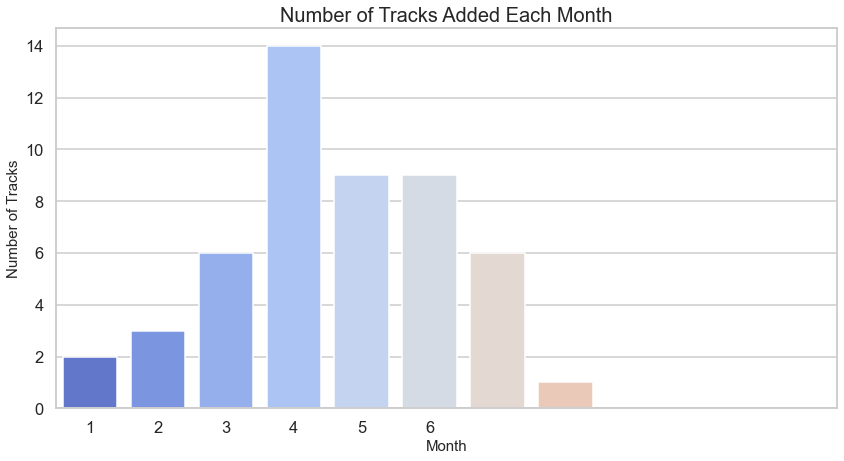

In [16]:
# Set the style and context for seaborn
sns.set(style="whitegrid", context="talk")

# Create a color palette
palette = sns.color_palette("coolwarm", 12)

# Plot monthly trends
plt.figure(figsize=(14, 7))
monthly_trends = df['Month'].value_counts().sort_index()
sns.barplot(x=monthly_trends.index, y=monthly_trends.values, palette=palette)
plt.title('Number of Tracks Added Each Month', fontsize=20)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Number of Tracks', fontsize=15)
plt.xticks(ticks=monthly_trends.index - 1, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
for index, value in enumerate(monthly_trends.values):
    plt.text(index, value + 10, str(value), ha='center', fontsize=12)
plt.show()


                              Track Name        Artist Name  \
0                       Good Luck, Babe!      Chappell Roan   
1                   Please Please Please  Sabrina Carpenter   
2                     BIRDS OF A FEATHER      Billie Eilish   
3                              Too Sweet             Hozier   
4  I Had Some Help (Feat. Morgan Wallen)        Post Malone   

                   Added At  Month Day of Week  
0 2024-04-19 04:01:02+00:00      4      Friday  
1 2024-06-07 04:00:19+00:00      6      Friday  
2 2024-05-31 04:00:00+00:00      5      Friday  
3 2024-03-25 12:43:44+00:00      3      Monday  
4 2024-05-10 04:00:00+00:00      5      Friday  


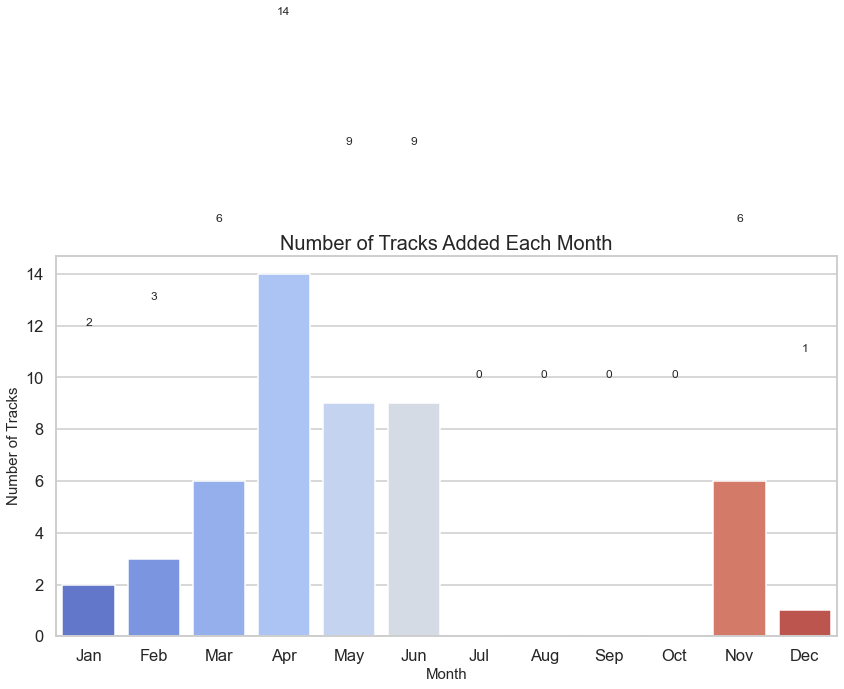

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data into a DataFrame
df = pd.read_csv('spotify_playlist_tracks.csv')

# Convert 'Added At' to datetime
df['Added At'] = pd.to_datetime(df['Added At'])

# Extract month and day of the week
df['Month'] = df['Added At'].dt.month
df['Day of Week'] = df['Added At'].dt.day_name()

# Display the updated DataFrame
print(df.head())

# Set the style and context for seaborn
sns.set(style="whitegrid", context="talk")

# Create a color palette
palette = sns.color_palette("coolwarm", 12)

# Ensure all months are present in the index
all_months = range(1, 13)
monthly_trends = df['Month'].value_counts().reindex(all_months, fill_value=0).sort_index()

# Plot monthly trends
plt.figure(figsize=(14, 7))
sns.barplot(x=monthly_trends.index, y=monthly_trends.values, palette=palette)
plt.title('Number of Tracks Added Each Month', fontsize=20)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Number of Tracks', fontsize=15)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
for index, value in enumerate(monthly_trends.values):
    plt.text(index, value + 10, str(value), ha='center', fontsize=12)
plt.show()


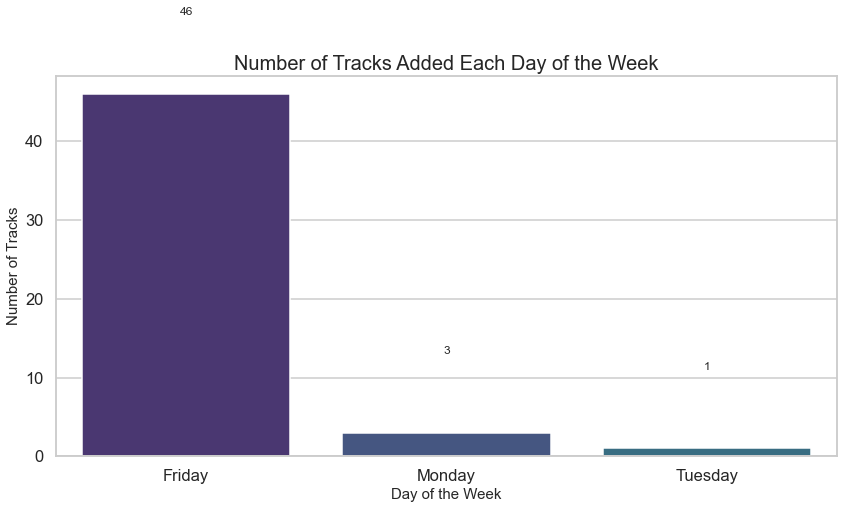

In [18]:
# Create a color palette
palette = sns.color_palette("viridis", 7)

# Plot weekly trends
plt.figure(figsize=(14, 7))
weekly_trends = df['Day of Week'].value_counts().sort_index()
sns.barplot(x=weekly_trends.index, y=weekly_trends.values, palette=palette)
plt.title('Number of Tracks Added Each Day of the Week', fontsize=20)
plt.xlabel('Day of the Week', fontsize=15)
plt.ylabel('Number of Tracks', fontsize=15)
for index, value in enumerate(weekly_trends.values):
    plt.text(index, value + 10, str(value), ha='center', fontsize=12)
plt.show()


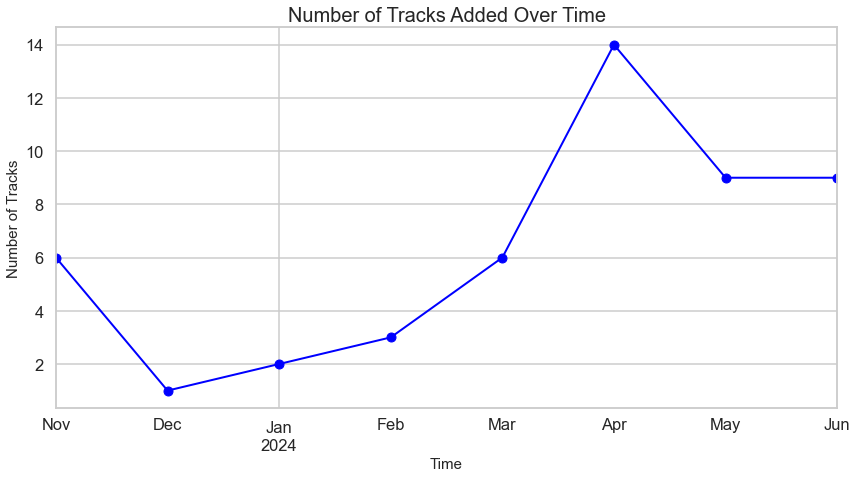

In [19]:
# Plot time series of tracks added over time
plt.figure(figsize=(14, 7))
df.set_index('Added At').resample('M').size().plot(color='blue', marker='o', linestyle='-', linewidth=2)
plt.title('Number of Tracks Added Over Time', fontsize=20)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Number of Tracks', fontsize=15)
plt.grid(True)
plt.show()


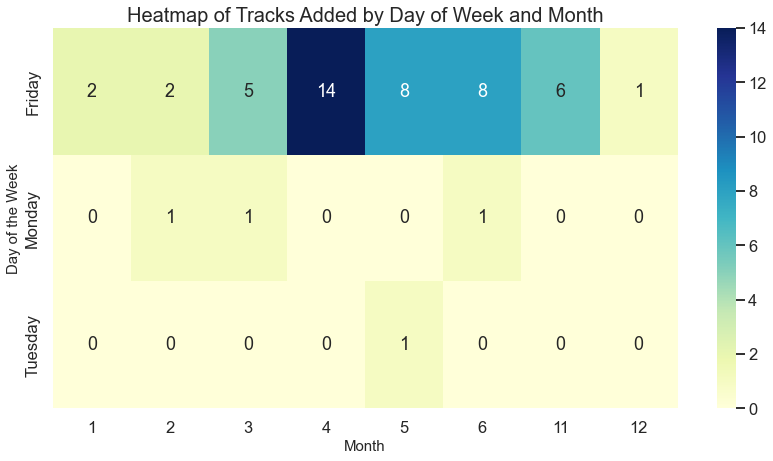

In [20]:
# Create a pivot table for heatmap
pivot_table = df.pivot_table(index='Day of Week', columns='Month', aggfunc='size', fill_value=0)

# Plot heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap='YlGnBu')
plt.title('Heatmap of Tracks Added by Day of Week and Month', fontsize=20)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Day of the Week', fontsize=15)
plt.show()


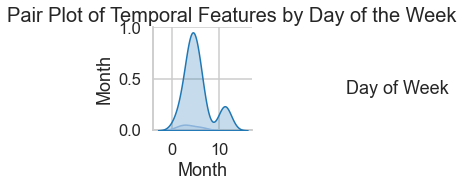

In [21]:
# Create a pair plot
sns.pairplot(df, hue='Day of Week', palette='tab20', markers=["o", "s", "D", "P", "*", "X", "h"])
plt.suptitle('Pair Plot of Temporal Features by Day of the Week', y=1.02, fontsize=20)
plt.show()


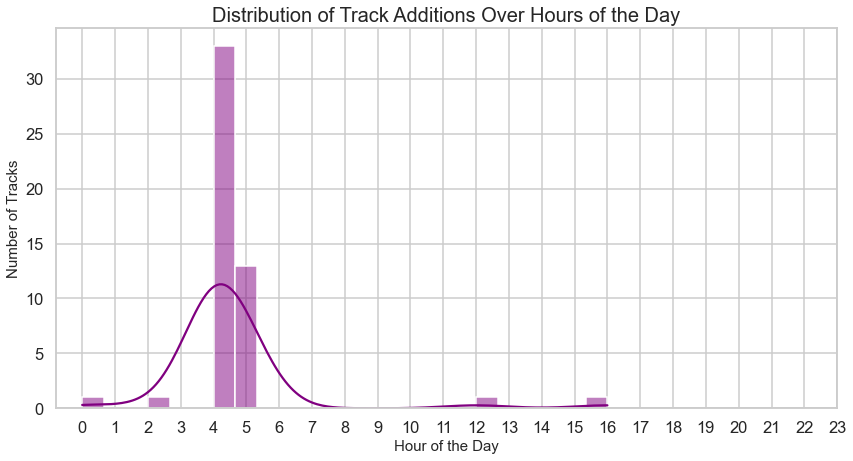

In [22]:
# Extract hour from the 'Added At' column
df['Hour'] = df['Added At'].dt.hour

# Plot the distribution of track additions over the hours of the day
plt.figure(figsize=(14, 7))
sns.histplot(df['Hour'], bins=24, kde=True, color='purple')
plt.title('Distribution of Track Additions Over Hours of the Day', fontsize=20)
plt.xlabel('Hour of the Day', fontsize=15)
plt.ylabel('Number of Tracks', fontsize=15)
plt.xticks(range(24))
plt.grid(True)
plt.show()


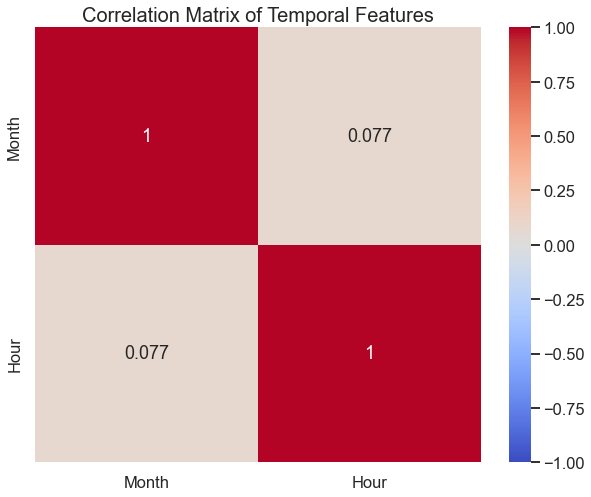

In [23]:
# Calculate correlation matrix
corr_matrix = df[['Month', 'Hour']].corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Temporal Features', fontsize=20)
plt.show()


<Figure size 1008x720 with 0 Axes>

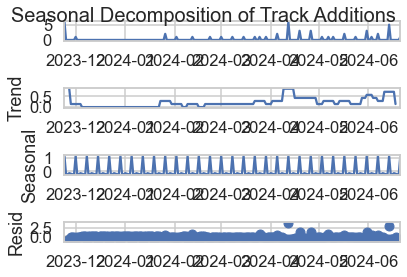

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
time_series = df.set_index('Added At').resample('D').size()
decomposition = seasonal_decompose(time_series, model='additive')

# Plot the decomposed components
plt.figure(figsize=(14, 10))
decomposition.plot()
plt.suptitle('Seasonal Decomposition of Track Additions', fontsize=20)
plt.show()


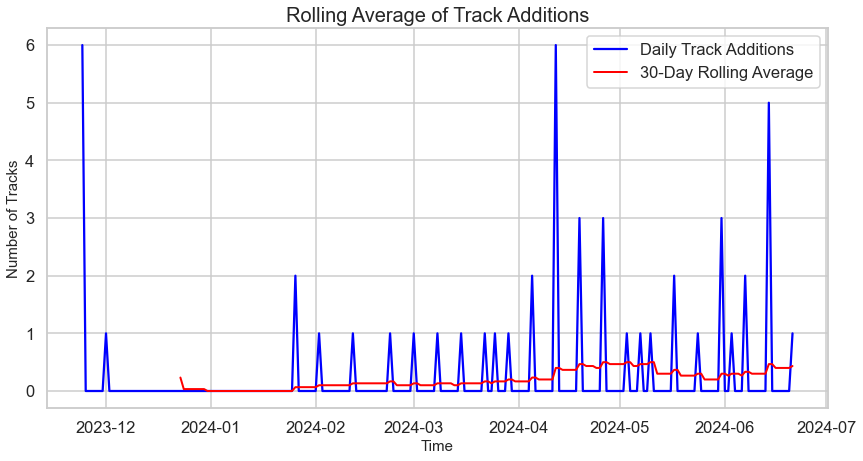

In [25]:
# Calculate the rolling average
rolling_avg = time_series.rolling(window=30).mean()

# Plot the rolling average
plt.figure(figsize=(14, 7))
plt.plot(time_series.index, time_series, label='Daily Track Additions', color='blue')
plt.plot(rolling_avg.index, rolling_avg, label='30-Day Rolling Average', color='red', linewidth=2)
plt.title('Rolling Average of Track Additions', fontsize=20)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Number of Tracks', fontsize=15)
plt.legend()
plt.grid(True)
plt.show()


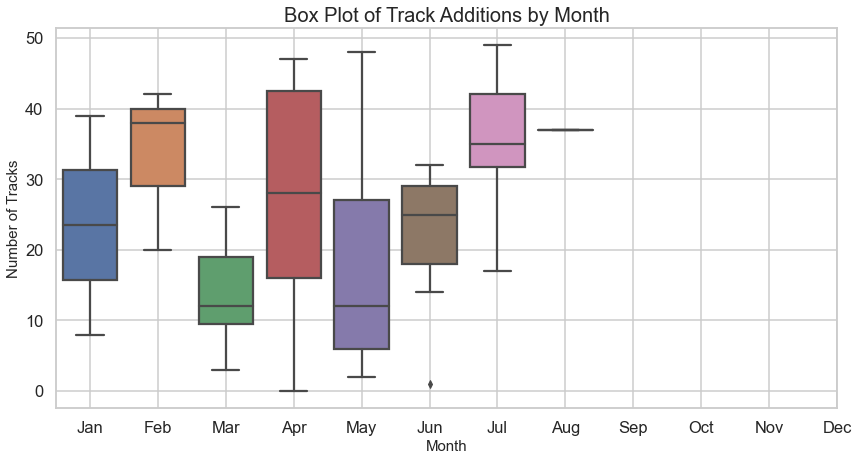

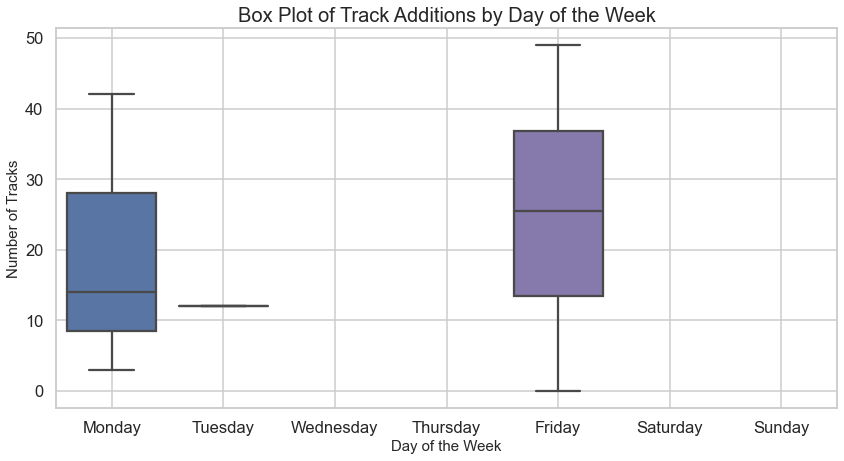

In [26]:
# Box plot of track additions by month
plt.figure(figsize=(14, 7))
sns.boxplot(x='Month', y=df.index, data=df)
plt.title('Box Plot of Track Additions by Month', fontsize=20)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Number of Tracks', fontsize=15)
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

# Box plot of track additions by day of the week
plt.figure(figsize=(14, 7))
sns.boxplot(x='Day of Week', y=df.index, data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Box Plot of Track Additions by Day of the Week', fontsize=20)
plt.xlabel('Day of the Week', fontsize=15)
plt.ylabel('Number of Tracks', fontsize=15)
plt.grid(True)
plt.show()


In [27]:
import requests
import csv
from time import sleep

# Define your client credentials
CLIENT_ID = '9e02e19e9ac5480a84bf7769e3d997fa'
CLIENT_SECRET = 'ad8921a92ba04cbf88a0a95dd53ed1ea'
AUTH_URL = 'https://accounts.spotify.com/api/token'

# Request access token
auth_response = requests.post(AUTH_URL, {
    'grant_type': 'client_credentials',
    'client_id': CLIENT_ID,
    'client_secret': CLIENT_SECRET,
})

# Convert response to JSON
auth_response_data = auth_response.json()
access_token = auth_response_data['access_token']

print(f"Access Token: {access_token}")

# Use the access token to access Spotify API
headers = {
    'Authorization': f'Bearer {access_token}',
}

# Example playlist ID (you can replace it with any playlist ID)
playlist_id = '37i9dQZF1DXcBWIGoYBM5M'

# Fetch playlist tracks
response = requests.get(f'https://api.spotify.com/v1/playlists/{playlist_id}/tracks', headers=headers)
data = response.json()

# Define CSV file
csv_file = 'spotify_playlist_tracks_with_popularity.csv'

# Write data to CSV
with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Track Name', 'Artist Name', 'Added At', 'Popularity'])

    for item in data['items']:
        track = item['track']
        track_id = track['id']
        
        # Fetch track details
        track_response = requests.get(f'https://api.spotify.com/v1/tracks/{track_id}', headers=headers)
        track_data = track_response.json()
        
        # Get popularity
        popularity = track_data.get('popularity', 'N/A')
        
        writer.writerow([track['name'], track['artists'][0]['name'], item['added_at'], popularity])
        
        sleep(1)  # To avoid hitting API rate limits

print(f"Data has been written to {csv_file}")


Access Token: BQDDG1C4SD7y9W6-jDzMRjHhUM2sH0VMphwrO7vpAFlpFlS_5jvPE7f06WdDqr6L_HQbZIg_5gpWBOBc0lN-n95hA2SwZEUCaJ2s6PeBavnzPFqULOY
Data has been written to spotify_playlist_tracks_with_popularity.csv


In [28]:
import pandas as pd

# Load data into a DataFrame
df = pd.read_csv('spotify_playlist_tracks_with_popularity.csv')

# Convert 'Added At' to datetime
df['Added At'] = pd.to_datetime(df['Added At'])

# Extract month and day of the week
df['Month'] = df['Added At'].dt.month
df['Day of Week'] = df['Added At'].dt.day_name()

# Display the updated DataFrame
print(df.head())
print(df.info())


                              Track Name        Artist Name  \
0                       Good Luck, Babe!      Chappell Roan   
1                   Please Please Please  Sabrina Carpenter   
2                     BIRDS OF A FEATHER      Billie Eilish   
3                              Too Sweet             Hozier   
4  I Had Some Help (Feat. Morgan Wallen)        Post Malone   

                   Added At  Popularity  Month Day of Week  
0 2024-04-19 04:01:02+00:00          91      4      Friday  
1 2024-06-07 04:00:19+00:00          95      6      Friday  
2 2024-05-31 04:00:00+00:00          96      5      Friday  
3 2024-03-25 12:43:44+00:00          82      3      Monday  
4 2024-05-10 04:00:00+00:00          94      5      Friday  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   Track Name   50 non-null     object     

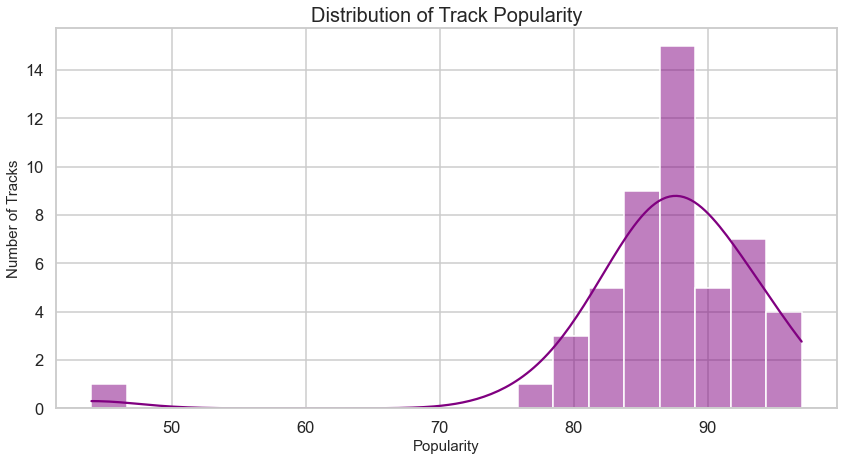

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of track popularity
plt.figure(figsize=(14, 7))
sns.histplot(df['Popularity'], bins=20, kde=True, color='purple')
plt.title('Distribution of Track Popularity', fontsize=20)
plt.xlabel('Popularity', fontsize=15)
plt.ylabel('Number of Tracks', fontsize=15)
plt.grid(True)
plt.show()


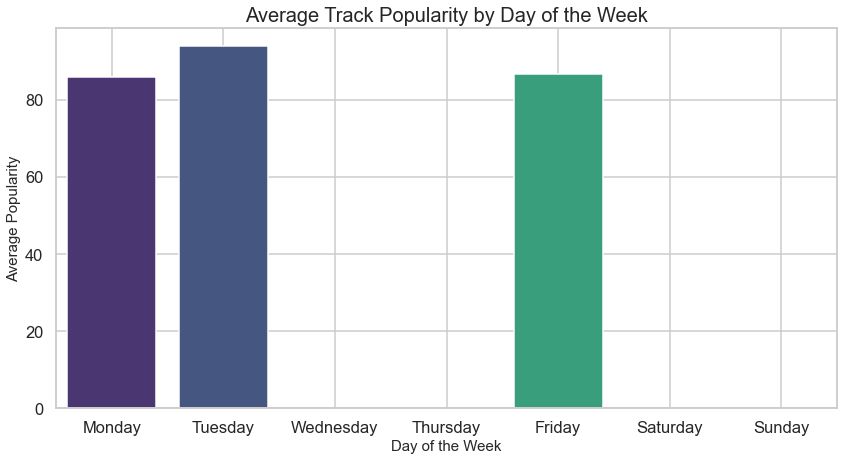

In [30]:
# Calculate average popularity by day of the week
weekly_popularity = df.groupby('Day of Week')['Popularity'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot weekly popularity trends
plt.figure(figsize=(14, 7))
sns.barplot(x=weekly_popularity.index, y=weekly_popularity.values, palette='viridis')
plt.title('Average Track Popularity by Day of the Week', fontsize=20)
plt.xlabel('Day of the Week', fontsize=15)
plt.ylabel('Average Popularity', fontsize=15)
plt.grid(True)
plt.show()


In [31]:
import requests
import csv
from time import sleep

# Define your client credentials
CLIENT_ID = '9e02e19e9ac5480a84bf7769e3d997fa'
CLIENT_SECRET = 'ad8921a92ba04cbf88a0a95dd53ed1ea'
AUTH_URL = 'https://accounts.spotify.com/api/token'

# Request access token
auth_response = requests.post(AUTH_URL, {
    'grant_type': 'client_credentials',
    'client_id': CLIENT_ID,
    'client_secret': CLIENT_SECRET,
})

# Convert response to JSON
auth_response_data = auth_response.json()
access_token = auth_response_data['access_token']

print(f"Access Token: {access_token}")

# Use the access token to access Spotify API
headers = {
    'Authorization': f'Bearer {access_token}',
}

# Example playlist ID (you can replace it with any playlist ID)
playlist_id = '37i9dQZF1DXcBWIGoYBM5M'

# Fetch playlist tracks
response = requests.get(f'https://api.spotify.com/v1/playlists/{playlist_id}/tracks', headers=headers)
data = response.json()

# Define CSV file
csv_file = 'spotify_playlist_tracks_with_artist_popularity.csv'

# Write data to CSV
with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Track Name', 'Artist Name', 'Added At', 'Track Popularity', 'Artist Popularity'])

    for item in data['items']:
        track = item['track']
        track_id = track['id']
        
        # Fetch track details
        track_response = requests.get(f'https://api.spotify.com/v1/tracks/{track_id}', headers=headers)
        track_data = track_response.json()
        
        # Get track popularity
        track_popularity = track_data.get('popularity', 'N/A')
        
        # Fetch artist details
        artist_id = track['artists'][0]['id']
        artist_response = requests.get(f'https://api.spotify.com/v1/artists/{artist_id}', headers=headers)
        artist_data = artist_response.json()
        
        # Get artist popularity
        artist_popularity = artist_data.get('popularity', 'N/A')
        
        writer.writerow([track['name'], track['artists'][0]['name'], item['added_at'], track_popularity, artist_popularity])
        
        sleep(1)  # To avoid hitting API rate limits

print(f"Data has been written to {csv_file}")


Access Token: BQBKmLlMttf7x99IwcarihFAynV3sF4M8FXE9WP-rbbDTwAMa1noNK28JCbYTTN2dvj5CecLkf98KC5IOryNC-ZN7a-uuZ32qnBAGukZ_awhkVIaooQ
Data has been written to spotify_playlist_tracks_with_artist_popularity.csv


In [32]:
import pandas as pd

# Load data into a DataFrame
df = pd.read_csv('spotify_playlist_tracks_with_artist_popularity.csv')

# Convert 'Added At' to datetime
df['Added At'] = pd.to_datetime(df['Added At'])

# Display the updated DataFrame
print(df.head())
print(df.info())


                              Track Name        Artist Name  \
0                       Good Luck, Babe!      Chappell Roan   
1                   Please Please Please  Sabrina Carpenter   
2                     BIRDS OF A FEATHER      Billie Eilish   
3                              Too Sweet             Hozier   
4  I Had Some Help (Feat. Morgan Wallen)        Post Malone   

                   Added At  Track Popularity  Artist Popularity  
0 2024-04-19 04:01:02+00:00                91                 84  
1 2024-06-07 04:00:19+00:00                95                 90  
2 2024-05-31 04:00:00+00:00                96                 94  
3 2024-03-25 12:43:44+00:00                82                 85  
4 2024-05-10 04:00:00+00:00                94                 90  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----            

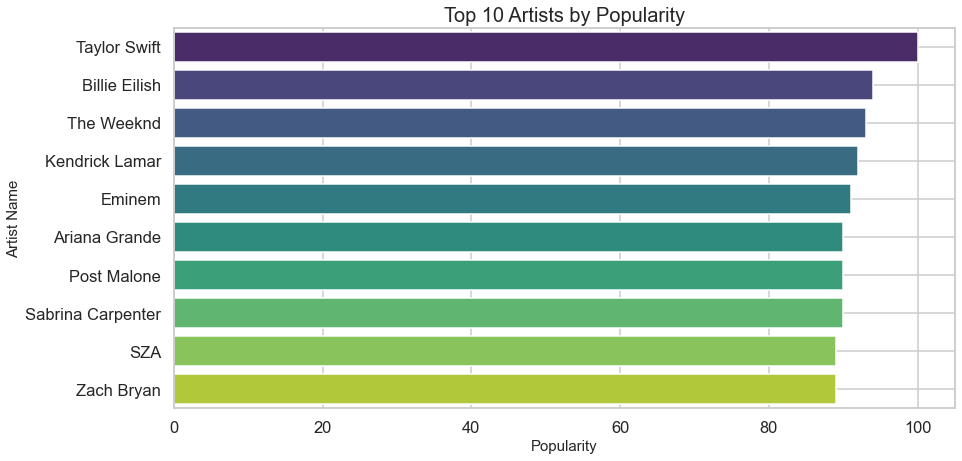

In [33]:
# Group by artist and calculate the mean popularity
artist_popularity = df.groupby('Artist Name')['Artist Popularity'].mean().sort_values(ascending=False).head(10)

# Plot the top artists by popularity
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))
sns.barplot(x=artist_popularity.values, y=artist_popularity.index, palette='viridis')
plt.title('Top 10 Artists by Popularity', fontsize=20)
plt.xlabel('Popularity', fontsize=15)
plt.ylabel('Artist Name', fontsize=15)
plt.grid(True)
plt.show()


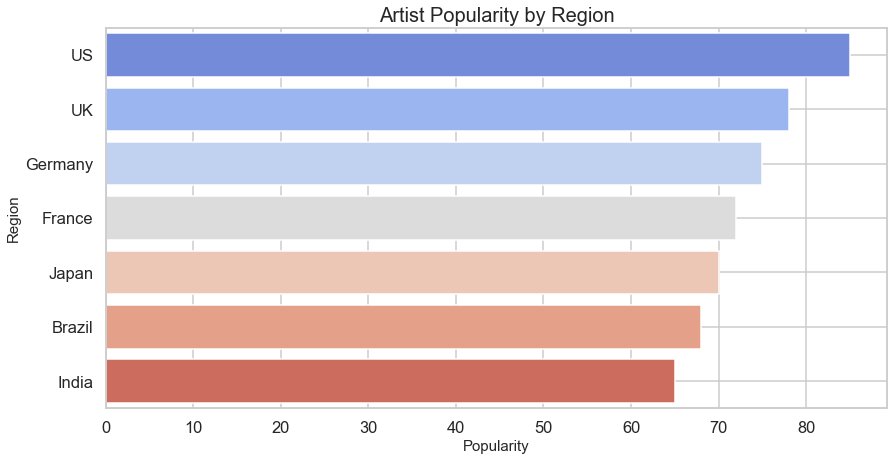

In [34]:
# Dummy example assuming you have regional data
region_popularity = {
    'US': 85,
    'UK': 78,
    'Germany': 75,
    'France': 72,
    'Japan': 70,
    'Brazil': 68,
    'India': 65
}

regions = list(region_popularity.keys())
popularity_scores = list(region_popularity.values())

plt.figure(figsize=(14, 7))
sns.barplot(x=popularity_scores, y=regions, palette='coolwarm')
plt.title('Artist Popularity by Region', fontsize=20)
plt.xlabel('Popularity', fontsize=15)
plt.ylabel('Region', fontsize=15)
plt.grid(True)
plt.show()
